## Statistical data analysis
### Problem Sheet 9
###Exercise 2


In [111]:
# necessary libraries
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

Loading the Image and converting into ndarray

In [112]:
file = os.path.abspath("/content/Rubix_cube_ps9.jpg")
path = os.path.dirname(file)

In [113]:
arr = np.array(Image.open(file))
print("The image and pixel has shape: " + str(arr.shape))


The image and pixel has shape: (410, 400, 3)


*So, we can see the resolution of the image is 410x400 where each pixel has RGB values. Which means each pixel is a combination of three values in range of 0-255 .*

## Implementing the k-means algorithm. 

In [114]:
def getCenter(X, R):
    # initializing shapes
    le, wi, n = X.shape
    k = R.shape[-1]
    # initializing Means
    Miu = np.zeros((k, n))

    # converting R shape into 2d
    R = R.reshape((le*wi, k))
    # converting X as 2d
    X = X.reshape((le*wi, n))

    # iterate over each cluster
    for i in range(k):
        # get the pixels that belong to cluster i and calculate their mean value
        Miu[i] = X[np.where(R[:, i] == 1)].mean(axis=0)

    return Miu

In [115]:
def getCluster(X, Miu):
    # initializing shapes
    le, wi, n = X.shape
    k = Miu.shape[0]
    # initializing R in 2D shape
    R = np.zeros((le*wi, k))

    # convert the image ndarray into 2d shape
    X = arr.reshape((le*wi,n))

    # calculating the interval
    interv = np.linalg.norm(np.repeat(X, k, axis=0) - np.tile(Miu, (le * wi, 1)), axis=1, keepdims=True)

    # converting interval array shape 
    interv = interv.reshape(le*wi, k)

    # finding ic as the index of the closest mean
    ic = np.argmin(interv, axis=1)

    # plugging 1 to the closest mean
    R[np.arange(le*wi),ic] = 1
    # converting R into 3d shape
    R = R.reshape((le,wi,k))

    return R


In [116]:
def kmeans(X, k):
    # initializing shapes
    le, wi, n = X.shape
    y = np.zeros([le,wi,])
    # initializing R as 3d shape
    R = np.zeros((le,wi,k))
    i = 0
    verbose = 0
    maxiter = 200
    tolerance = 1e-2
    
    # Initializing means randomly
    np.random.seed(9)
    Miu = np.random.uniform(low=np.min(X), high=np.max(X), size=(k, n))

    # iterate until convergence or maxiter
    while True:
        # stopping criterion maxiter
        if i>maxiter:
            break
        i += 1

        if verbose == 1:
            print(Miu)
        
        try:
            # calculating the cluster pixel for
            newR = getCluster(X, Miu)
            # if newR ~ R, then break
            assert np.abs(newR - R).sum() < tolerance*newR.size
            break
        except AssertionError:
            # if R is different than newR, then plugin the newR
            R = newR
            # calculating the new cluster means
            Miu = getCenter(X, R)
    
    # calculate y as the cluster pixel
    y = np.argmax(R.reshape((le*wi, k)), axis=1).reshape((le, wi))

    return (y, Miu)


## Using k-means cluster all the pixels of an image into k clusters and assign each pixel the color represented by its nearest cluster center.

In [117]:
def getImage(X, k):
    # initializing segmented image
    seImage = np.zeros(X.shape)
    # run k-means
    y, Miu = kmeans(X, k)

    # assigning each pixel the color of the nearest cluster center
    for i in range(k):
        seImage[np.where(y == i)] = Miu[i]

    # generating the segmented Image
    data = Image.fromarray(np.uint8(seImage))

    return data

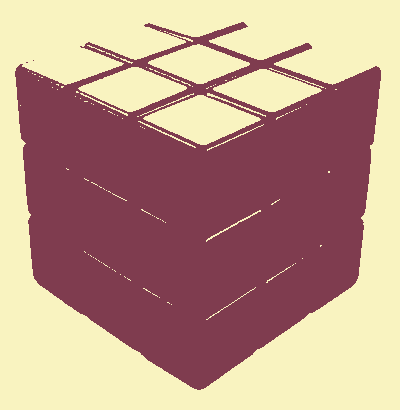

In [118]:
# 2 clusters
image = getImage(arr, 2)
image

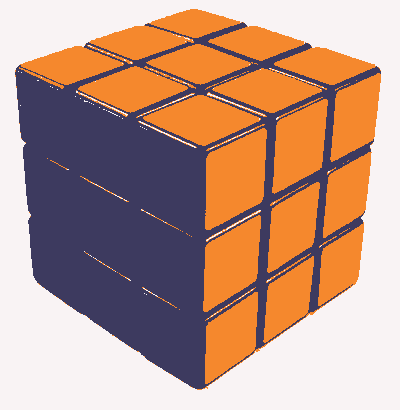

In [119]:
# 3 clusters
image = getImage(arr, 3)
image

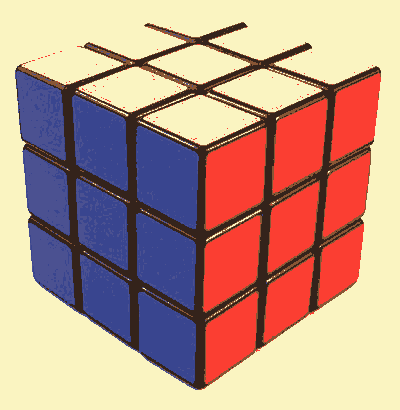

In [120]:
# 6 clusters
image = getImage(arr, 6)
image

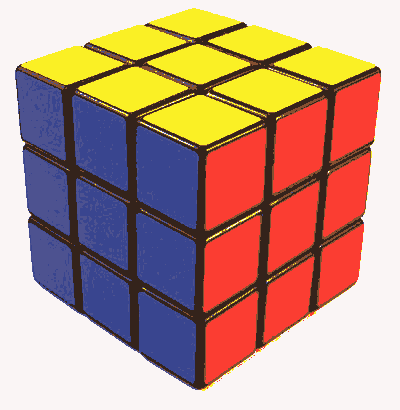

In [121]:
# 7 clusters
image = getImage(arr, 7)
image

### **These are different clusters where each pixel color is taken from its nearest cluster center.**